In [33]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 

import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)

from pandas_profiling import ProfileReport

import numpy as np
from itertools import chain

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
import plotly.io as pi



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB

In [34]:
data = pd.read_csv("final_data.csv") #loading the data set 

<img src="Workflow.png">

In [64]:
data.head() #top five values 

,userid,Time,Country,Automotive,Travel,Food,Gender
1411,1793,2020-03-02 2:00:13,US,Automotive,Travel,Food,Female
704,704,2020-02-29 2:00:29,US,Automotive,Travel,Food,Female
2436,1399,2020-03-01 13:00:07,US,Automotive,Travel,Food,Male
2532,1574,2020-03-01 8:00:16,US,Automotive,Travel,Food,Male
54,13,2020-02-27 0:00:08,AR,Automotive,Travel,Food,Female


In [36]:
data.info() #information of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2875 entries, 0 to 2874
Data columns (total 8 columns):
Unnamed: 0    2875 non-null int64
userid        2875 non-null int64
Time          2875 non-null object
Country       2871 non-null object
Automotive    2875 non-null object
Travel        2875 non-null object
Food          2875 non-null object
Gender        2875 non-null object
dtypes: int64(2), object(6)
memory usage: 179.8+ KB


In [65]:
#data = data.drop(["Unnamed: 0"],axis=1)

In [66]:
data

,userid,Time,Country,Automotive,Travel,Food,Gender
1411,1793,2020-03-02 2:00:13,US,Automotive,Travel,Food,Female
704,704,2020-02-29 2:00:29,US,Automotive,Travel,Food,Female
2436,1399,2020-03-01 13:00:07,US,Automotive,Travel,Food,Male
2532,1574,2020-03-01 8:00:16,US,Automotive,Travel,Food,Male
54,13,2020-02-27 0:00:08,AR,Automotive,Travel,Food,Female
...,...,...,...,...,...,...,...
1450,1849,2020-03-02 4:59:58,US,Automotive,Travel,Food,Female
1201,1457,2020-03-01 11:00:21,US,Automotive,Travel,Food,Female
2426,1381,2020-03-01 4:00:07,US,Automotive,Travel,Food,Male
2648,1791,2020-03-02 0:00:00,JP,Automotive,Travel,Food,Male


# General statistics of data like Mean,Median, Mode 

In [67]:
def statistics(variable):
    if variable.dtype == "int64" or variable.dtype == "float64":
        return pd.DataFrame([[variable.name, np.mean(variable), np.std(variable), np.median(variable), np.var(variable)]], 
                            columns = ["Variable", "Mean", "Standard Deviation", "Median", "Variance"]).set_index("Variable")
    else:
        return pd.DataFrame(variable.value_counts())

# Gender distribution in data

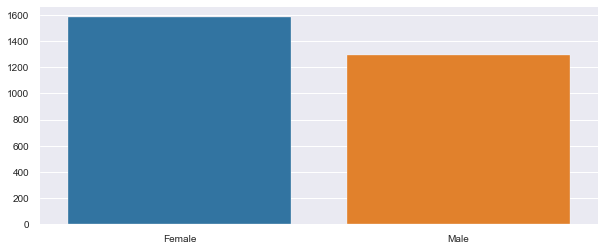

In [68]:
genders = data.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

In [69]:
gender = data["Gender"]
statistics(gender)


,Gender
Female,1581
Male,1294


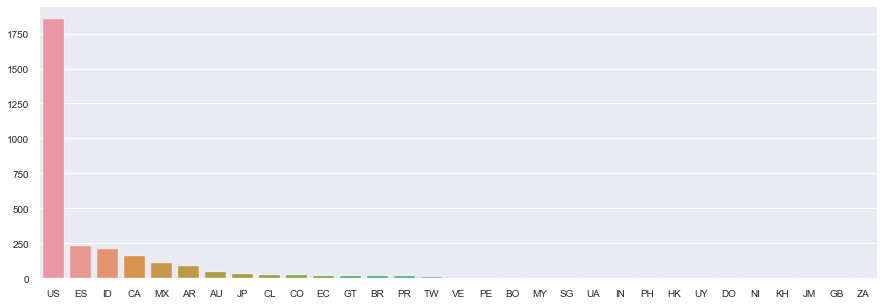

In [70]:
genders = data.Country.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(15,5))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

Data Preprocessing with Label Encoding techique and one hot encoding


In [71]:
import sklearn.utils
data = sklearn.utils.shuffle(data)

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

print('\n\ndf: {0}'.format(data))



df:       userid                 Time Country  Automotive  Travel  Food  Gender
644      651   2020-02-29 8:59:56      US  Automotive  Travel  Food  Female
947     1050   2020-02-29 4:59:59      US  Automotive  Travel  Food  Female
2122     735   2020-02-29 5:59:01      US  Automotive  Travel  Food    Male
2646    1791   2020-03-02 0:00:00      JP  Automotive  Travel  Food    Male
1075    1280  2020-02-29 11:00:20      US  Automotive  Travel  Food  Female
...      ...                  ...     ...         ...     ...   ...     ...
567      538   2020-02-28 6:00:11      EC  Automotive  Travel  Food  Female
1115    1351   2020-03-01 0:00:11      US  Automotive  Travel  Food  Female
910      989  2020-02-29 12:00:17      US  Automotive  Travel  Food  Female
2044     590   2020-02-28 4:00:04      US  Automotive  Travel  Food    Male
205      183   2020-02-27 7:38:58      US  Automotive  Travel  Food  Female

[2875 rows x 7 columns]


In [72]:

features = data[['Country', 'Automotive','Travel','Food']]
features = pd.get_dummies(data=features, columns=['Country', 'Automotive','Travel','Food'])

features.values


array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]], dtype=uint8)

In [73]:
#class_le = LabelEncoder()
#features = class_le.fit_transform(features.values)


In [74]:
label = data.iloc[:,-1]

label.values

array(['Female', 'Female', 'Male', ..., 'Female', 'Male', 'Female'],
      dtype=object)

In [75]:
from sklearn.preprocessing import LabelEncoder

class_le = LabelEncoder()
y = class_le.fit_transform(label.values)

# Decision Tree Algorithm

Decision Tree Analysis is a general, predictive modelling tool that has applications spanning a number of different areas. In general, decision trees are constructed via an algorithmic approach that identifies ways to split a data set based on different conditions. It is one of the most widely used and practical methods for supervised learning. Decision Trees are a non-parametric supervised learning method used for both classification and regression tasks. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

The decision rules are generally in form of if-then-else statements. The deeper the tree, the more complex the rules and fitter the model.

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


np.random.seed(42)




# Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = train_test_split(features, y, 
                                                    test_size=0.20)




In [49]:
# Create a decision tree regressor and fit it to the training set
classifier = DecisionTreeClassifier()
classifier.fit(X_train,y_train)

# Report the score of the prediction using the testing set
score = classifier.score(X_test,y_test)

In [50]:
print("The decision tree classifier's r2_score is: {:.4f}".format(score))

The decision tree classifier's r2_score is: 0.7165


# Naive Bayes algorithm

It is a classification technique based on Bayes’ Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.

For example, a fruit may be considered to be an apple if it is red, round, and about 3 inches in diameter. Even if these features depend on each other or upon the existence of the other features, all of these properties independently contribute to the probability that this fruit is an apple and that is why it is known as ‘Naive’.

Naive Bayes model is easy to build and particularly useful for very large data sets. Along with simplicity, Naive Bayes is known to outperform even highly sophisticated classification methods

In [51]:
classifier = LogisticRegression(random_state=0) #navie bais classifier 
classifier.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
y_pred = classifier.predict(X_test) #predicting with test data

In [53]:
from sklearn.metrics import confusion_matrix #confusion matrix for true positive rate
 

In [54]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[307,  16],
       [149, 103]], dtype=int64)

In [55]:
classifierNB = GaussianNB()
classifierNB.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [56]:
y_predNB = classifierNB.predict(X_test)


In [57]:
cmNB = confusion_matrix(y_test, y_predNB)
cmNB


array([[ 68, 255],
       [  6, 246]], dtype=int64)

# XGboost Algorithm 

Boosting


In boosting, the trees are built sequentially such that each subsequent tree aims to reduce the errors of the previous tree. Each tree learns from its predecessors and updates the residual errors. Hence, the tree that grows next in the sequence will learn from an updated version of the residuals.

The base learners in boosting are weak learners in which the bias is high, and the predictive power is just a tad better than random guessing. Each of these weak learners contributes some vital information for prediction, enabling the boosting technique to produce a strong learner by effectively combining these weak learners. The final strong learner brings down both the bias and the variance.

In contrast to bagging techniques like Random Forest, in which trees are grown to their maximum extent, boosting makes use of trees with fewer splits. Such small trees, which are not very deep, are highly interpretable. Parameters like the number of trees or iterations, the rate at which the gradient boosting learns, and the depth of the tree, could be optimally selected through validation techniques like k-fold cross validation. Having a large number of trees might lead to overfitting. So, it is necessary to carefully choose the stopping criteria for boosting.

In [58]:
from xgboost import XGBClassifier #loading the XGboost classifier

from sklearn.metrics import accuracy_score #for error rate and cost functioning calculating 


In [59]:

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [60]:


# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [61]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 71.65%
